In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from ucimlrepo import fetch_ucirepo
from scipy.stats.mstats import winsorize

In [43]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

# Combinarlos
df = pd.concat([X, y], axis=1)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [44]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [47]:
(df.isnull().sum() * 100) / 302

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.324503
thal        0.662252
num         0.000000
dtype: float64

## Variables cuantitativas 
<ul>
    <li>age</li>
    <li>trestbps (resting blood pressure) </li>
    <li>chol (serum cholestoral)</li>
    <li>thalach (maximum heart rate achieved)</li>
    <li>oldpeak (ST depression induced by exercise relative to rest)</li>
    <li>ca (number of major vessels (0-3) colored by flourosopy)</li>
</ul>

## Variables cualitativas
<ul>
    <li>sex</li>
    <li>cp (chest pain)</li>
    <li>fbs (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)</li>
    <li>restecg (resting electrocardiographic results)</li>
    <li>exang (exercise induced angina) (1 = yes; 0 = no)</li>
    <li>slope (the slope of the peak exercise ST segment)</li>
    <li>thal (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
</ul>


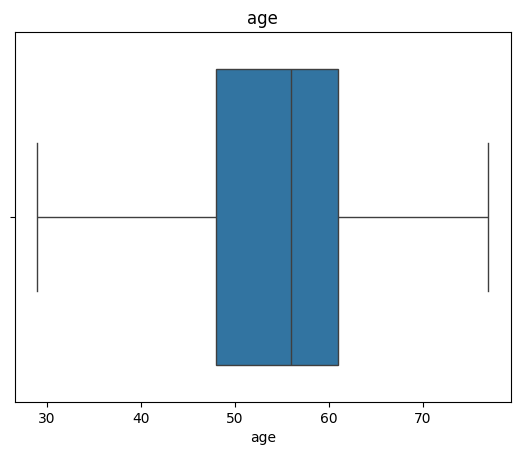

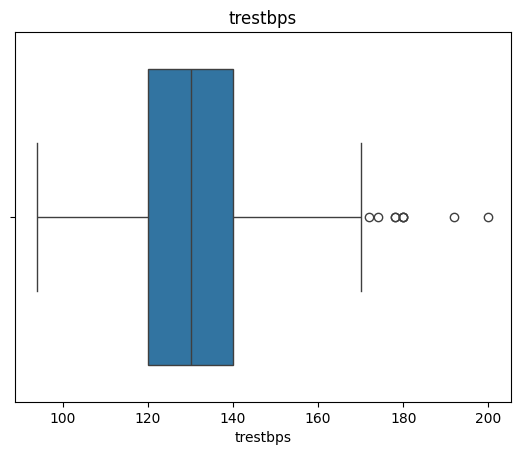

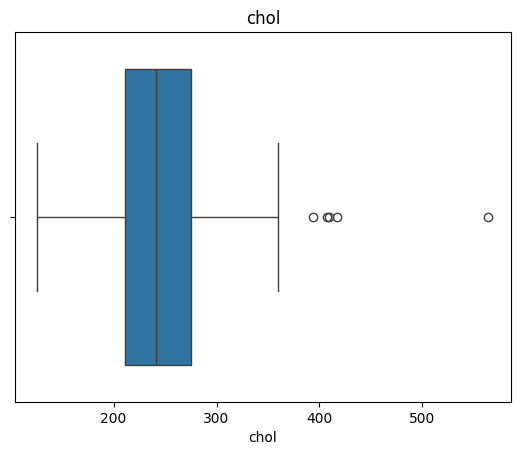

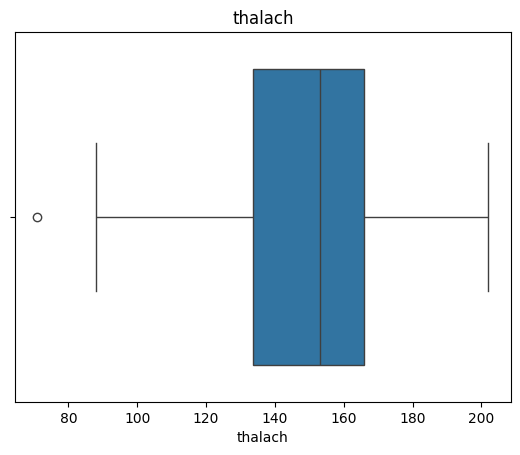

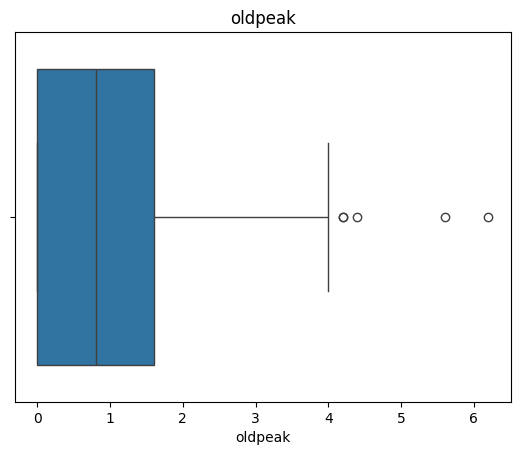

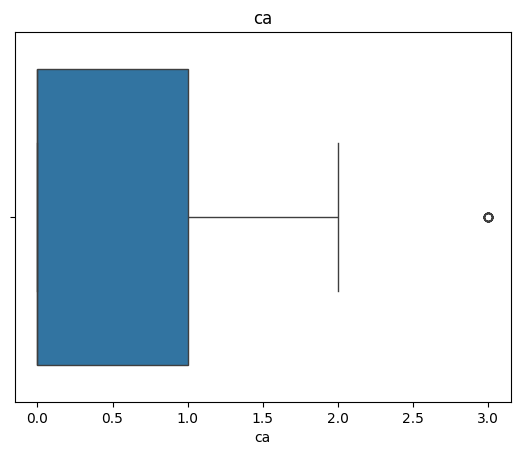

In [48]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for col in cols:
    sns.boxplot(x=col, data = df)
    plt.title(col)
    plt.show()

## Datos faltantes

Las unicas variables que presentan datos faltantes son ca y thal, como estos representan menos del 5 porciento del total de los datos podemos imputar los datos faltantes

In [49]:
df = df.dropna() 

In [50]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [51]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    print(f'{col}: {df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]} outliers')
    if col == 'oldpeak':
        df[col] = df[col].clip(lim_inf, lim_sup)


age: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
thalach: 1 outliers
oldpeak: 5 outliers
ca: 20 outliers


/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_13598/3648756792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lim_inf, lim_sup)


In [52]:
df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
df['thalach'] = winsorize(df['thalach'], limits=[0.05, 0.05])

/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_13598/1743842953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_13598/1743842953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_13598/1743842953.py:3: SettingWithCopyWarning: 
A value is trying to be set o